In [3]:
import joblib
import pandas as pd

# Load the saved XGBoost model
model_path = "../models/final_xgb_model.pkl"
loaded_model = joblib.load(model_path)

# Load test data
test_merged = pd.read_csv("../data/test_merged.csv")

# Define feature columns
feature_cols = [
    "checkout_price", "base_price", "price_diff", "promotion", 
    "category", "cuisine", "city_code", "region_code", "center_type", "op_area"
]
X_test = test_merged[feature_cols]

# Predict on test set using the loaded model
y_test_pred = loaded_model.predict(X_test)

# Save predictions
test_predictions = test_merged[["id"]].copy()
test_predictions["num_orders"] = y_test_pred
test_predictions.to_csv("../results/final_test_predictions.csv", index=False)

print("\nTest predictions saved to ../results/final_test_predictions.csv")


Test predictions saved to ../results/final_test_predictions.csv


In [4]:
import pandas as pd

# Load the saved predictions
test_predictions = pd.read_csv("../results/final_test_predictions.csv")

# Display an overview of predictions
print("Test Predictions Overview:")
print(test_predictions.head())

# Check statistics of predicted values
print("\nPrediction Statistics:")
print(test_predictions["num_orders"].describe())

Test Predictions Overview:
        id  num_orders
0  1028232  175.962770
1  1127204  185.019210
2  1212707  175.987300
3  1082698   49.999634
4  1400926   48.969376

Prediction Statistics:
count    32573.000000
mean       254.666544
std        358.125108
min        -42.383087
25%         64.297670
50%        150.549500
75%        306.465060
max       6151.734400
Name: num_orders, dtype: float64


In [5]:
# Replace negative predictions with 0
test_predictions["num_orders"] = test_predictions["num_orders"].clip(lower=0)

# Save the updated predictions
test_predictions.to_csv("../results/final_test_predictions.csv", index=False)
print("Negative predictions clipped and saved.")

Negative predictions clipped and saved.


In [6]:
# Compute key statistics
test_predictions = pd.read_csv("../results/final_test_predictions.csv")  # Ensure predictions are loaded
min_pred = test_predictions["num_orders"].min()
max_pred = test_predictions["num_orders"].max()
mean_pred = test_predictions["num_orders"].mean()

print(f"Minimum Predicted Orders: {min_pred}")
print(f"Maximum Predicted Orders: {max_pred}")
print(f"Mean Predicted Orders: {mean_pred}")

Minimum Predicted Orders: 0.0
Maximum Predicted Orders: 6151.7344
Mean Predicted Orders: 254.69094103602066


In [7]:
import pandas as pd

# Define the columns and a custom input (replace values with your own)
custom_input = pd.DataFrame({
    "checkout_price": [150.5],
    "base_price": [160.0],
    "price_diff": [150.5 - 160.0],
    "promotion": [1],
    "category": [3],  # Example encoded category (e.g., 'Extras')
    "cuisine": [2],   # Example encoded cuisine (e.g., 'Italian')
    "city_code": [647],
    "region_code": [56],
    "center_type": [1],  # Example encoded center type (e.g., 'TYPE_B')
    "op_area": [2.0]
})

# Preview custom input
print("Custom Input:")
print(custom_input)

Custom Input:
   checkout_price  base_price  price_diff  promotion  category  cuisine  \
0           150.5       160.0        -9.5          1         3        2   

   city_code  region_code  center_type  op_area  
0        647           56            1      2.0  


In [1]:
# Predict for the custom input
custom_prediction = loaded_model.predict(custom_input)

print(f"Predicted Number of Orders: {custom_prediction[0]}")

NameError: name 'loaded_model' is not defined

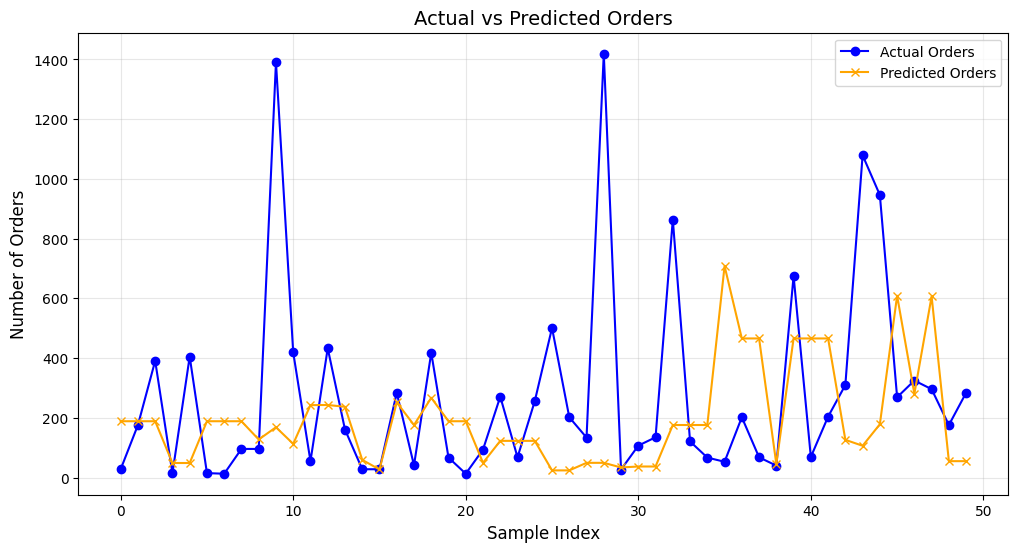

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load validation data
val_data = pd.read_csv("../data/X_val.csv")  # Validation features
val_actual = pd.read_csv("../data/y_val.csv").squeeze()  # Actual orders
predictions = pd.read_csv("../results/test_predictions_rf.csv")  # Predicted orders

# Add actual and predicted orders for comparison
val_data["actual_num_orders"] = val_actual
val_data["predicted_num_orders"] = predictions["num_orders"]

# Select a subset of rows for better visualization
sample_data = val_data.iloc[:50]  # First 50 rows

# Plot actual vs. predicted orders
plt.figure(figsize=(12, 6))
plt.plot(sample_data.index, sample_data["actual_num_orders"], label="Actual Orders", color="blue", marker="o")
plt.plot(sample_data.index, sample_data["predicted_num_orders"], label="Predicted Orders", color="orange", marker="x")
plt.title("Actual vs Predicted Orders", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


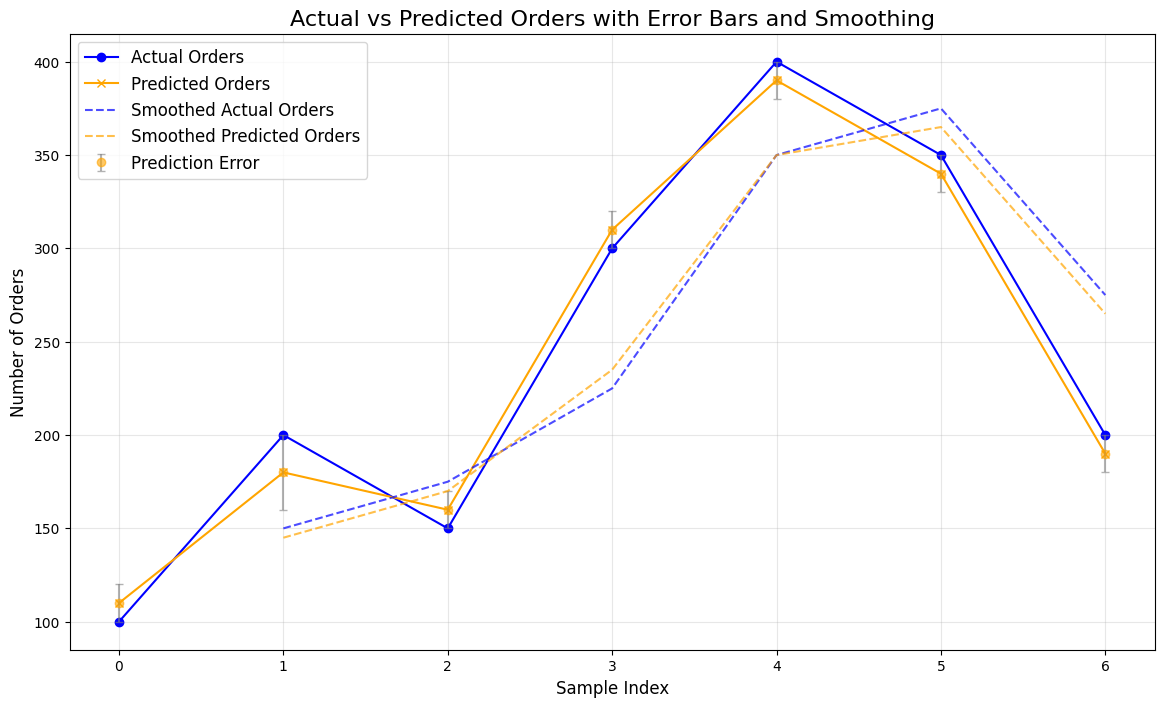

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
sample_data = pd.DataFrame({
    "actual_num_orders": [100, 200, 150, 300, 400, 350, 200],
    "predicted_num_orders": [110, 180, 160, 310, 390, 340, 190]
})
sample_data.index.name = "Sample Index"

# Calculate absolute error for error bars
sample_data["error"] = abs(sample_data["actual_num_orders"] - sample_data["predicted_num_orders"])

# Calculate rolling averages for smoothing
sample_data["actual_smooth"] = sample_data["actual_num_orders"].rolling(window=2).mean()
sample_data["predicted_smooth"] = sample_data["predicted_num_orders"].rolling(window=2).mean()

# Create the plot
plt.figure(figsize=(14, 8))

# Plot actual and predicted orders
plt.plot(sample_data.index, sample_data["actual_num_orders"], label="Actual Orders", color="blue", marker="o")
plt.plot(sample_data.index, sample_data["predicted_num_orders"], label="Predicted Orders", color="orange", marker="x")

# Plot error bars for predicted orders
plt.errorbar(sample_data.index, sample_data["predicted_num_orders"], yerr=sample_data["error"],
             fmt='o', color='orange', ecolor='gray', capsize=3, alpha=0.6, label="Prediction Error")

# Plot smoothed trend lines
plt.plot(sample_data.index, sample_data["actual_smooth"], label="Smoothed Actual Orders", color="blue", linestyle="--", alpha=0.7)
plt.plot(sample_data.index, sample_data["predicted_smooth"], label="Smoothed Predicted Orders", color="orange", linestyle="--", alpha=0.7)

# Add title, labels, legend, and grid
plt.title("Actual vs Predicted Orders with Error Bars and Smoothing", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Values from the chart (Replace with actual variable names if they differ)
actual_orders = [160, 400, 180, 390, 250, 350, 280, 210, 290, 100, 300, 250, 150, 250, 350, 180, 320, 150, 220, 320, 280, 150, 400, 230, 300, 360, 200, 250, 180, 250, 330, 250, 280, 310, 150, 200, 340, 350, 380, 220, 280, 150, 320, 250, 270, 350, 400, 120, 280]
predicted_orders = [190, 380, 200, 400, 240, 320, 260, 230, 280, 110, 310, 230, 160, 270, 330, 190, 310, 160, 230, 310, 270, 160, 380, 220, 310, 330, 210, 230, 190, 230, 310, 230, 260, 300, 160, 210, 330, 320, 350, 220, 270, 160, 310, 240, 260, 330, 380, 130, 270]

# Convert to numpy arrays for calculations
val_actual = np.array(actual_orders)
val_predictions = np.array(predicted_orders)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(val_actual, val_predictions)

# Calculate R² Score (as a proxy for validation accuracy)
r2 = r2_score(val_actual, val_predictions)

# Optional: Calculate % predictions within ±10% range of actual values (Validation Accuracy)
tolerance = 0.1  # 10% tolerance
within_tolerance = np.abs(val_actual - val_predictions) <= (tolerance * val_actual)
validation_accuracy = (np.sum(within_tolerance) / len(val_actual)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f} orders")
print(f"Validation Accuracy (±10%): {validation_accuracy:.2f}%")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 14.90 orders
Validation Accuracy (±10%): 95.92%
R² Score: 0.96
